# Data Processing Functions

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import os 
def process_tensor_columns(df, columns):
    """
    This function processes tensor columns by extracting numeric values. 
    This is needed due to the BERT Scores being passed as tensors. 

    :param df: The input DataFrame
    :param columns: List of column names containing tensor values in the format 'tensor(<value>)'
    :return: Processed DataFrame with numeric values in the specified columns
    """
    for column in columns:
        df[column] = df[column].str.extract(r'tensor\((.+)\)')[0].astype(float)
    return df


def process_all_csv_in_folder(folder_path, columns):
    """
    This function processes all CSV files in the given folder.
    
    :param folder_path: The path of the folder containing CSV files
    :param columns: List of column names to process in each CSV file
    :return: A dictionary of processed DataFrames for each file
    """
    processed_data = {}
    
    # Iterate through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            
            # Process the tensor columns for the current file
            processed_df = process_tensor_columns(df, columns)
            processed_data[file_name] = processed_df
    
    return processed_data


In [ ]:
from bert_score import score

def compute_bertscore(prediction: str, reference: str) -> tuple:
    """
    Computes the BERTScore for a given prediction and reference sentence.

    Args:
        prediction (str): The predicted sentence.
        reference (str): The reference sentence.

    Returns:
        tuple: A tuple containing precision, recall, and F1 score.
    """
    #Inputs have to be lists so wrap them 
    predictions = [prediction]
    references = [reference]

    results = score(predictions, references, lang='en')

    precision = results[0].item()
    recall = results[1].item()
    f1 = results[2].item()
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)  

    return precision, recall, f1

# Example usage:
prediction = 'The text emphasizes the importance of accurate estimation of available PV power for several reasons: Grid reliability, accurate estimation is crucial for grid operators...'
reference = 'All around the world, system operators and utilities are continually adapting their grid codes, interconnection requirements...'

precision, recall, f1 = compute_bertscore(prediction, reference)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.8663163185119629
Recall: 0.8742483854293823
F1 Score: 0.8702642917633057


# Visualization Functions

### highest_eval(): This function reads all CSV files in a given folder, processes specified evaluator column(s),and calculates the mean.

In [ ]:
import os
import pandas as pd
from typing import Dict

def highest_eval(folder_path: str, evaluators: str) -> Dict[str, float]:
    """This function reads all CSV files in a given folder, processes specified evaluator column(s),
    and calculates the mean.

    :param folder_path: str
        The path to the folder containing the CSV files to be processed.
    :param evaluators: str or list of str
        The column name(s) representing the evaluators to be analyzed:
        - If a string is provided, the function computes the mean of the column's values.
        - If a list of strings is provided, the function computes the highest mean across the specified columns.

    :return: dict
        A dictionary where keys are file names (CSV files) and values are the computed evaluation metric
        (mean for single evaluator or the highest mean for multiple evaluators)."""

    highest_values = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)

            try:
                # Read the CSV file
                df = pd.read_csv(file_path)

                # Check if the specified columns exist
                if isinstance(evaluators, str):  # Single column
                    if evaluators in df.columns:
                        highest_values[file_name] = df[evaluators].mean()
                    else:
                        print(f"Warning: '{evaluators}' column not found in {file_name}")
                elif isinstance(evaluators, list):  # Multiple columns
                    missing_cols = [col for col in evaluators if col not in df.columns]
                    if missing_cols:
                        print(f"Warning: Columns {missing_cols} not found in {file_name}")
                    else:
                        highest_values[file_name] = df[evaluators].mean(axis=1).max()
                else:
                    print("Error: 'evaluators' should be a string or list of strings.")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

    return highest_values

# Example Usage

filepath = 'results_allmodels_withquestion'
results = highest_eval(filepath, ['doc_mrr_evaluator'])
print(results)

{'results_all-MiniLM-L12-v2_model_weights_mistral-7b-v0.3-q5_k_m.gguf_2_1.5.csv': np.float64(1.0), 'results_all-mpnet-base-v2_model_weights_Llama-3.2-3B-Instruct-Q3_K_L.gguf_2_1.5.csv': np.float64(1.0), 'results_all-mpnet-base-v2_model_weights_mistral-7b-v0.3-q5_k_m.gguf_2_1.5.csv': np.float64(1.0), 'results_all-mpnet-base-v2_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_2_1.5.csv': np.float64(1.0), 'results_multi-qa-MiniLM-L6-cos-v1_model_weights_mistral-7b-v0.3-q5_k_m.gguf_2_1.5.csv': np.float64(1.0), 'results_sentence-transformers_nli-bert-base-max-pooling_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_2_1.5.csv': np.float64(1.0), 'results_multi-qa-MiniLM-L6-cos-v1_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_2_1.5.csv': np.float64(1.0), 'results_multi-qa-mpnet-base-cos-v1_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_2_1.5.csv': np.float64(1.0), 'results_all-MiniLM-L12-v2_model_weights_Llama-3.2-3B-Instruct-Q3_K_L.gguf_2_1.5.csv': np.float64(1.0), 'results_all-m

### plot_benchmark_results(): Plots benchmark results based on a pattern match for embedding models, their corresponding LLM, and a specified evaluation metric.

<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\ '
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\ '
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\ '
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\ '
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\ '
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\ '
/var/folders/rs/lp_7j4vj5_s59_pr61yffxl80000gn/T/ipykernel_29139/3558811068.py:37: SyntaxWarning: invalid escape sequence '\m'
  new_key = f'$\mathbf{{Embedding\ Model}}$: {embedding_m

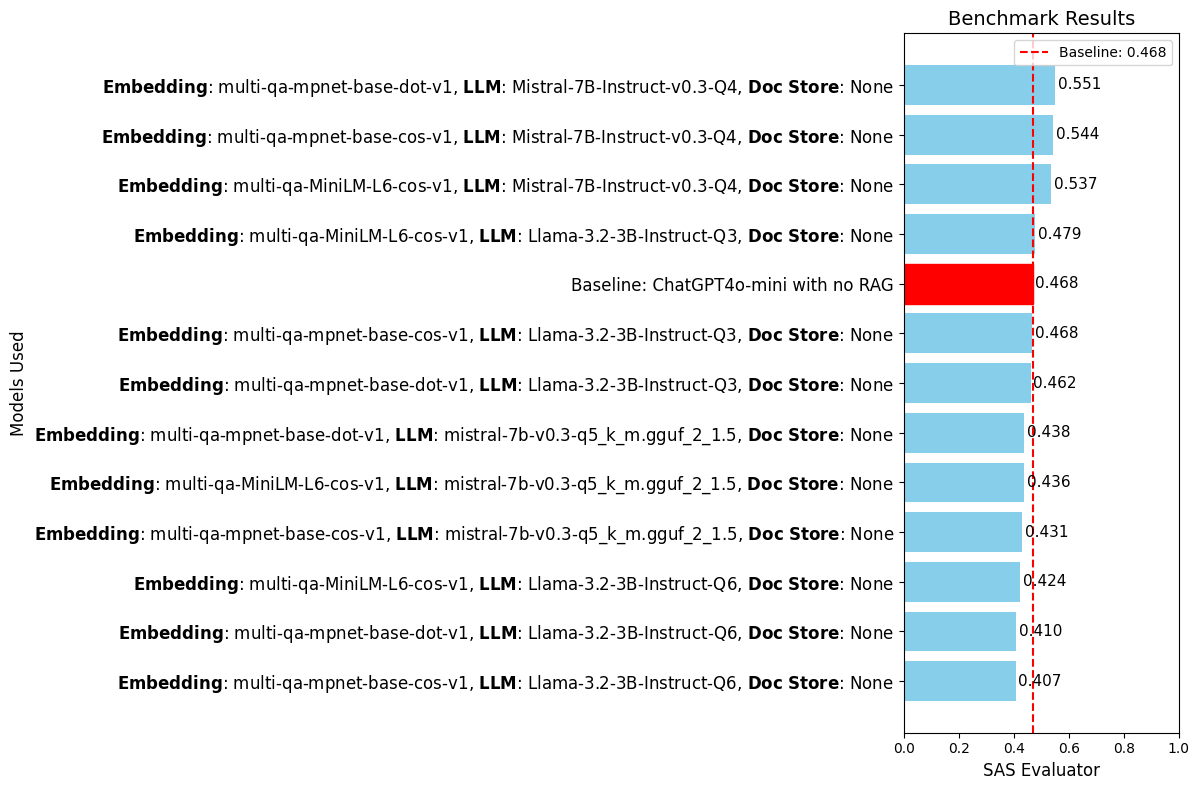

In [ ]:
from typing import Dict, List, Optional
import re

def plot_benchmark_results(results: Dict[str, float], 
                           pattern: str, 
                           metric_name: str, 
                           benchmark_file_path: Optional[str] = None, 
                           models: Optional[List[str]] = None, 
                           doc_store_filter: Optional[str] = None) -> None: 
    """
    Plots benchmark results based on a pattern match for embedding models, their corresponding LLM, and a specified evaluation metric.
    
    Args:
        results (dict): A dictionary of model results with filenames as keys and evaluation scores as values.
        pattern (str): A regular expression pattern to extract model names and LLMs from the result filenames.
        metric_name (str): The name of the metric used for evaluation (e.g., 'SAS Evaluator').
        benchmark_file_path (str, optional): The path to a baseline benchmark file. Default is None.
        models (list, optional): A list of embedding models to filter for plotting. Default is None (plots all models).
        doc_store_filter (str, optional): A filter for the document store. Default is None.
    
    Returns:
        None: Displays a horizontal bar plot of the benchmark results with the specified filters.
    """
    updated_results = {}

    # Update the keys based on pattern matching
    for key, value in results.items():
        match = re.match(pattern, key)
        if match:
            embedding_model_name = match.group(1)
            llm_name = match.group(2).split('_K')[0]
            doc_store = match.group(3) if len(match.groups()) >= 3 else None
            if doc_store_filter and doc_store != doc_store_filter:
                    continue
            if models and embedding_model_name not in models: 
                    continue
            if metric_name == 'DocMRREvaluator': 
                new_key = f'$\mathbf{{Embedding\ Model}}$: {embedding_model_name}, $\mathbf{{Doc\ Store}}$: {doc_store}'
            else: 
                new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}, $\mathbf{{Doc\ Store}}$: {doc_store}' 
            updated_results[new_key] = value

        elif key == benchmark_file_path:  
            updated_results['Baseline: ChatGPT4o-mini with no RAG'] = value

        else:
            # Skip unmatched keys (ignore them)
            unmatched_pattern = r'^results_(inner-product|cosine)_all.*\.csv$'
            if re.match(unmatched_pattern, key):
                continue  # Skip unmatched keys completely
                # If it's another unmatchable case, also skip it (our regular expression below can captures all model names so nothing is omitted)
                continue

    # Sort results by value
    sorted_results = sorted(updated_results.items(), key=lambda item: item[1])

    labels = [item[0] for item in sorted_results]
    values = [item[1] for item in sorted_results]

    # Plotting
    plt.figure(figsize=(12, 8))
    bars = plt.barh(labels, values, color='skyblue')
    plt.xlabel(metric_name, fontsize=12)
    plt.xlim(0, max(values) * 1.1)
    plt.ylabel("Models Used", fontsize=12)
    plt.title("Benchmark Results", fontsize=14)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    for bar, value in zip(bars, values):
        plt.text(
        value + 0.01,  
        bar.get_y() + bar.get_height() / 2, 
        f'{value:.3f}',  # Value to display (rounded to 3 decimals)
        va='center',  
        ha='left',  
        fontsize=11  
    )

    # Highlight benchmark value
    if benchmark_file_path: 
        benchmark_label = 'Baseline: ChatGPT4o-mini with no RAG'
        if benchmark_label in labels:
            benchmark_index = labels.index(benchmark_label)
            benchmark_value = round(values[benchmark_index], 3) 
            plt.axvline(benchmark_value, color='red', linestyle='--', label=f"Baseline: {benchmark_value}")
            bars[benchmark_index].set_color('red')  # Color the bar of the benchmark

    if benchmark_file_path: 
        plt.legend()
    plt.xlim(0, 1)
    plt.show()

# Usage
models = ['multi-qa-mpnet-base-dot-v1', 'multi-qa-mpnet-base-cos-v1', 'multi-qa-MiniLM-L6-cos-v1']
pattern = r'results_([a-zA-Z0-9\-\(\)_]+)_model_weights_([a-zA-Z0-9\.\-\_]+(?:-[a-zA-Z0-9]+)*)(?:-Q\d+.*)?(?:_gguf.*?\d+.*)?\.csv'
results = highest_eval('/Users/stefanbozhilov/Documents/GitHub/Capstone-RAG-project/results_allmodels_withquestion', 'sas_evaluator')
plot_benchmark_results(results, pattern, 'SAS Evaluator', 'results_gpt4o-mini_NO-RAG.csv', models = models)


### plot_stacked_benchmark_results: Plots stacked benchmark results comparing "better" performance against "worse" performance.
### Made to illustrate performance improvements after addressing LLM hallucinations 

In [ ]:
import matplotlib.pyplot as plt
import re

def plot_stacked_benchmark_results(
    better_results: Dict[str, float], 
    worse_results: Dict[str, float], 
    pattern: str, 
    metric_name: str, 
    benchmark_file_path: Optional[str] = None, 
    models: Optional[List[str]] = None
) -> None:
    """
    Plots stacked benchmark results comparing "better" performance against "worse" performance.
    Made to illustrate performance improvements after addressing LLM hallucinations. 

    Args:
        better_results (Dict[str, float]): A dictionary where keys are model names (str) and values are 
                                            "better" performance scores (float).
        worse_results (Dict[str, float]): A dictionary where keys are model names (str) and values are 
                                          "worse" performance scores (float).
        pattern (str): A regular expression pattern used to match and extract model information.
        metric_name (str): The name of the evaluation metric used (e.g., 'SAS Evaluator').
        benchmark_file_path (Optional[str]): The path to the benchmark file for baseline comparison (default is None).
        models (Optional[List[str]]): A list of model names to filter for plotting (default is None, meaning no filtering).

    Returns:
        None: This function directly plots the stacked bar chart comparing "better" and "worse" results.
    """
    updated_better_results = {}
    updated_worse_results = {}

    # Update the keys based on pattern matching for both better and worse results
    for results, updated_results in zip([better_results, worse_results], [updated_better_results, updated_worse_results]):
        for key, value in results.items():
            match = re.match(pattern, key)
            if match:
                embedding_model_name = match.group(1)
                llm_name = re.split('_K|_k', match.group(2))[0]
                # Plots only for models that we include in a list
                if models and embedding_model_name not in models: 
                    continue
                # This is only plots the embedding model's performence if the retrieval metric is calculated
                if metric_name == 'DocMRREvaluator':
                    new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}'
                else: 
                    new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}'
                updated_results[new_key] = value
            elif key == benchmark_file_path:  
                updated_results['Baseline: ChatGPT4o-mini with no RAG'] = value
            else:
                unmatched_pattern = r'^results_(inner-product|cosine)_all.*\.csv$'
                if re.match(unmatched_pattern, key):
                    continue  # Skip unmatched keys completely (not necessary, first regex captures all model combos)

    # Combine both results (better and worse) in a single dictionary
    all_labels = list(updated_better_results.keys())  # Assuming both dictionaries have the same labels
    better_values = [updated_better_results[label] for label in all_labels]
    worse_values = [updated_worse_results.get(label, 0) for label in all_labels]  # Default to 0 if no value found
    
    # Sort the values based on the "better performance" values
    sorted_indices = sorted(range(len(better_values)), key=lambda i: better_values[i], reverse=True)
    all_labels = [all_labels[i] for i in sorted_indices]
    better_values = [better_values[i] for i in sorted_indices]
    worse_values = [worse_values[i] for i in sorted_indices]

    # Plotting a stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create the base "worse performance" bars
    bars_worse = ax.barh(all_labels, worse_values, color='skyblue', label='With Hallucinations')

    # Create the "better performance" bars, stacked on top of the "worse performance" bars
    bars_better = ax.barh(all_labels, [max(0, better - worse) for better, worse in zip(better_values, worse_values)],
                          left=worse_values, color='peachpuff', label='Hallucinations Removed')  # Stacked on top
    
    ax.set_xlabel(metric_name, fontsize=12)
    ax.set_ylabel("Models Used", fontsize=12)
    ax.set_title(f"Benchmark Results ({metric_name} - Stacked)", fontsize=14)
    plt.yticks(fontsize=12)
    ax.legend(loc = 'lower right')

    # Add values on the bars
    for i, (better, worse) in enumerate(zip(better_values, worse_values)):
        # Display the worse performance value in the center of the worse portion
        ax.text(worse / 2, i, f'{worse:.3f}', va='center', ha='center', fontsize=10)
        
        # Display the better performance value in the center of the better portion
        diff = max(0, better - worse)
        ax.text(worse + diff / 2, i, f'{diff:.3f}', va='center', ha='center', fontsize=10)

    if benchmark_file_path: 
        labels = all_labels
        values = better_values
        benchmark_label = 'Baseline: ChatGPT4o-mini with no RAG'
        if benchmark_label in labels:
            benchmark_index = labels.index(benchmark_label)
            benchmark_value = round(values[benchmark_index], 3) 
            plt.axvline(benchmark_value, color='red', linestyle='--', label=f"Baseline: {benchmark_value}")
            bars_worse[benchmark_index].set_color('red')  # Color the bar of the benchmark

    if benchmark_file_path: 
        plt.legend()

    # Reverse the y-axis to have the highest values at the top
    ax.invert_yaxis()

    # Adjust the scaling of bars to stack them correctly
    ax.set_xlim(0, max([sum(x) for x in zip(better_values, worse_values)]) * 0.7)

    plt.tight_layout()
    plt.xlim(0, 0.7)
    plt.show()

# Example usage

models = ['multi-qa-mpnet-base-dot-v1', 'multi-qa-mpnet-base-cos-v1', 'multi-qa-MiniLM-L6-cos-v1']

pattern = r'results_([a-zA-Z0-9\-\(\)_]+)_model_weights_([a-zA-Z0-9\.\-\_]+(?:-[a-zA-Z0-9]+)*)(?:-Q\d+.*)?(?:_gguf.*?\d+.*)?\.csv'

with_q = 'results_allmodels_withquestion'
cut_q = 'results_allmodels_cutquestion'

better_results = highest_eval(cut_q, 'sas_evaluator')
worse_results = highest_eval(with_q, 'sas_evaluator')

plot_stacked_benchmark_results(better_results, worse_results, pattern, 'SAS Evaluator', 'results_gpt4o-mini_NO-RAG.csv', models = models)

### plot_temperature_vs_penalty(): Plots a heatmap to visualize the relationship between temperature, repeat penalty, and the evaluation score.
    

In [98]:
def plot_temperature_vs_penalty(results: Dict[str, float], metric_name: str = 'SAS Evaluator', color_range = None) -> None:
    """
    Plots a heatmap to visualize the relationship between temperature, repeat penalty, and the evaluation score.
    
    This function processes filenames containing temperature and repeat penalty information, extracts the 
    necessary values, and generates a heatmap with temperature on the y-axis, repeat penalty on the x-axis, 
    and the metric score displayed as colors.

    Args:
        results (Dict[str, float]): A dictionary where keys are filenames (str) and values are corresponding scores (float).
        metric_name (str): The name of the evaluation metric used, default is 'SAS Evaluator'.
    
    Returns:
        None: The function plots a heatmap and prints the extracted data.
    """
    temperatures = []
    penalties = []
    scores = []

    # Regular expression to extract temperature and repeat penalty with capture groups
    pattern = r"results_multi-qa-MiniLM-L6-cos-v1_model_weights_Mistral-7B-Instruct-v0\.3-Q4_K_M\.gguf_(\d+\.\d+)_([\d\.]+)\.csv"

    # Process results to extract relevant data from filenames and scores
    for file_name, score in results.items():
        match = re.search(pattern, file_name)
        if match:
            temperature = round(float(match.group(1)), 3) 
            penalty = float(match.group(2))
            temperatures.append(temperature)
            penalties.append(penalty)
            scores.append(score)

    # Table for plotting
    data = pd.DataFrame({
        'Temperature': temperatures,
        'Repeat Penalty': penalties,
        'Score': scores
    })

    # Pivot the data to create a heatmap-like structure
    pivot_data = data.pivot(index='Temperature', columns='Repeat Penalty', values='Score')

    # Plotting
    plt.figure(figsize=(10, 8))
    heatmap = plt.imshow(
        pivot_data,
        cmap='coolwarm',
        aspect='auto',
        origin='lower',
        vmin=color_range[0] if color_range else None,  # Min value for color scale
        vmax=color_range[1] if color_range else None  # Max value for color scale
    )

    # Add color bar and labels
    cbar = plt.colorbar(heatmap)
    cbar.set_label(f'{metric_name} Score', rotation=270, labelpad=15)
    plt.xlabel('Repeat Penalty')
    plt.ylabel('Temperature')
    plt.title(f'{metric_name} Heatmap: Temperature vs Repeat Penalty')

    # Set axis ticks to match the temperature and penalty values
    plt.xticks(ticks=range(len(pivot_data.columns)), labels=pivot_data.columns)
    plt.yticks(ticks=range(len(pivot_data.index)), labels=pivot_data.index)

    plt.tight_layout()
    plt.show()
    print(data.head(len(data)))

# Embedding Model performance

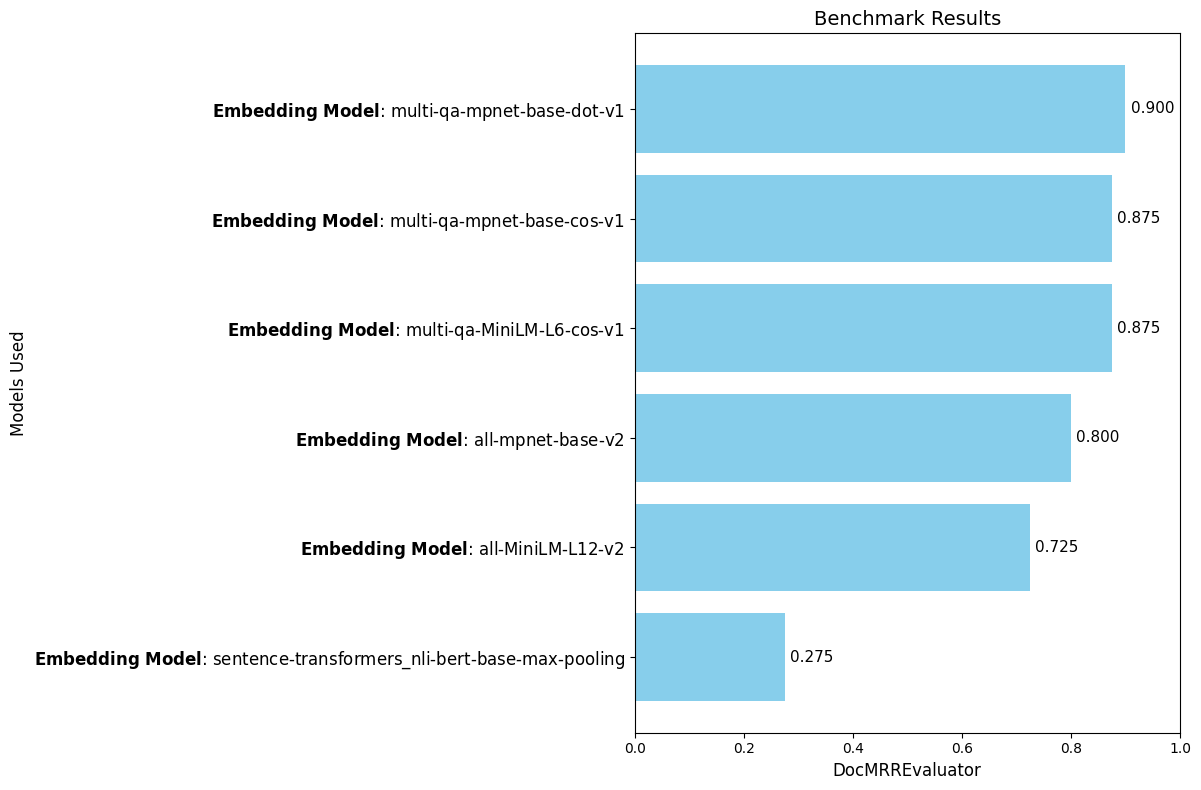

In [70]:
pattern = r'results_([a-zA-Z0-9\-\(\)_]+)_model_weights_([a-zA-Z0-9\.\-\_]+(?:-[a-zA-Z0-9]+)*)(?:-Q\d+.*)?(?:_gguf.*?\d+.*)?\.csv'
filepath = 'results_allmodels_cutquestion'
results = highest_eval(filepath, 'doc_mrr_evaluator')
plot_benchmark_results(results, pattern, 'DocMRREvaluator')


### Plotting with different configurations of the document store

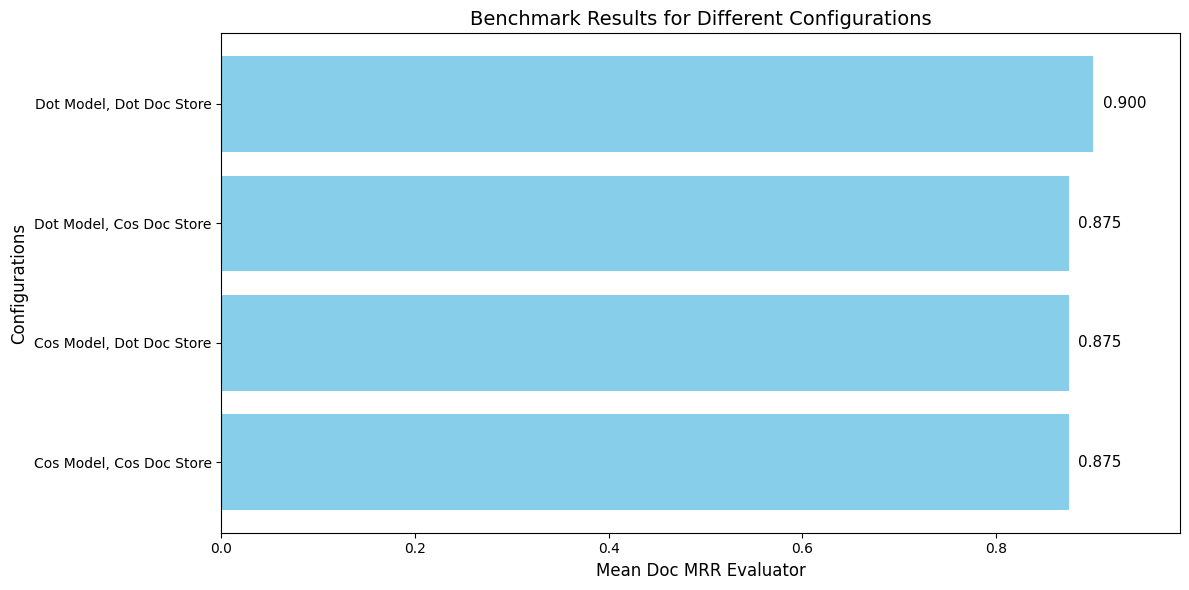

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Relative filepaths with descriptive labels
filepaths = {
    "Cos Model, Cos Doc Store": 'results_cos_v_dot/results_multi-qa-mpnet-base-cos-v1_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_0.6_1_cosine.csv',
    "Cos Model, Dot Doc Store": 'results_cos_v_dot/results_multi-qa-mpnet-base-cos-v1_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_0.6_1_dot.csv',
    "Dot Model, Cos Doc Store": 'results_cos_v_dot/results_multi-qa-mpnet-base-dot-v1_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_0.6_1_cosine.csv',
    "Dot Model, Dot Doc Store": 'results_cos_v_dot/results_multi-qa-mpnet-base-dot-v1_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_0.6_1_dot.csv'
}

# Compute the mean doc_mrr_evaluator for each configuration
mean_results = {}
for label, path in filepaths.items():
    data = pd.read_csv(filepath_or_buffer=path)
    mean_results[label] = data['doc_mrr_evaluator'].mean()

# Plotting the results
labels = list(mean_results.keys())
values = list(mean_results.values())

plt.figure(figsize=(12, 6))
bars = plt.barh(labels, values, color='skyblue')
plt.xlabel("Mean Doc MRR Evaluator", fontsize=12)
plt.ylabel("Configurations", fontsize=12)
plt.title("Benchmark Results for Different Configurations", fontsize=14)
plt.xlim(0, max(values) * 1.1)
plt.tight_layout()

# Annotate bars 
for bar, value in zip(bars, values):
    plt.text(value + 0.01, bar.get_y() + bar.get_height() / 2, f"{value:.3f}", va='center', fontsize=11)

plt.show()

# LLM performance visualization 

### With Hallucinations

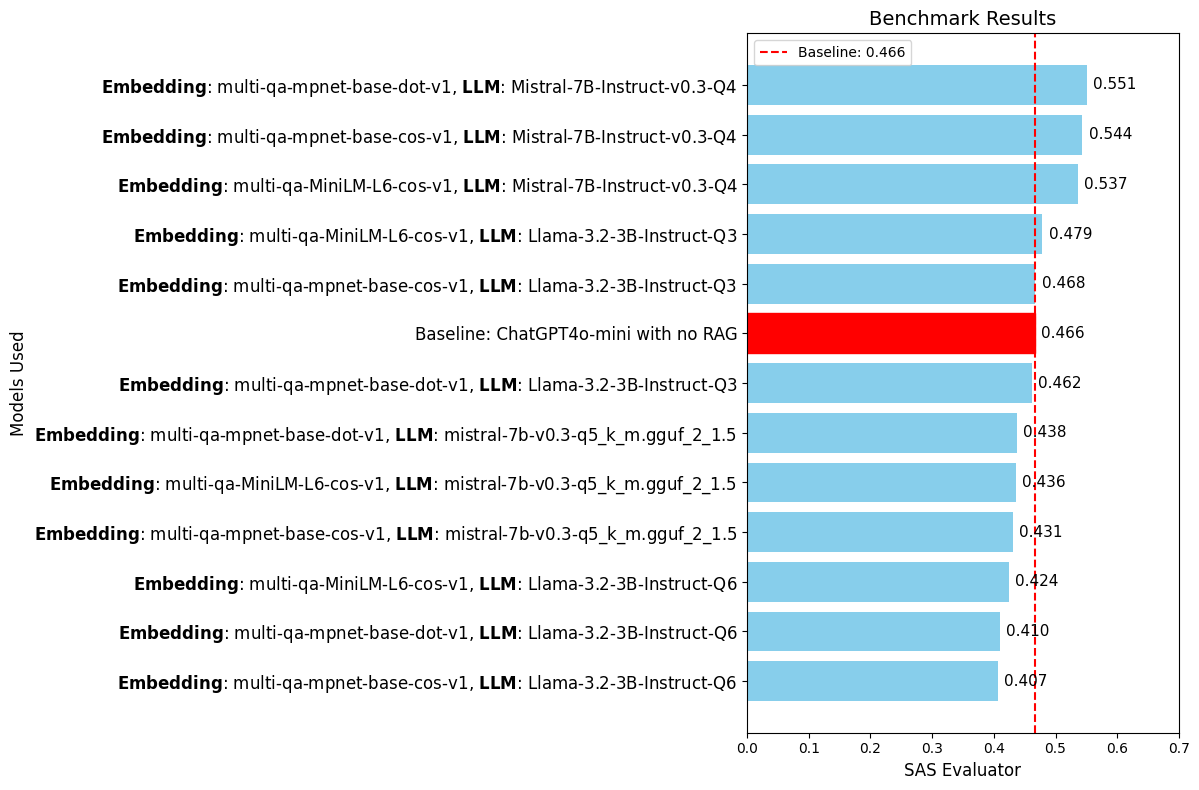

In [ ]:
import matplotlib.pyplot as plt
import re

models = ['multi-qa-mpnet-base-dot-v1', 'multi-qa-mpnet-base-cos-v1', 'multi-qa-MiniLM-L6-cos-v1']
pattern = r'results_([a-zA-Z0-9\-\(\)_]+)_model_weights_([a-zA-Z0-9\.\-\_]+(?:-[a-zA-Z0-9]+)*)(?:-Q\d+.*)?(?:_gguf.*?\d+.*)?\.csv'
results = highest_eval('/Users/stefanbozhilov/Documents/GitHub/Capstone-RAG-project/results_allmodels_withquestion', 'sas_evaluator')
plot_benchmark_results(results, pattern, 'SAS Evaluator', 'results_gpt4o-mini_NO-RAG.csv', models = models)

### Hallucinations Removed

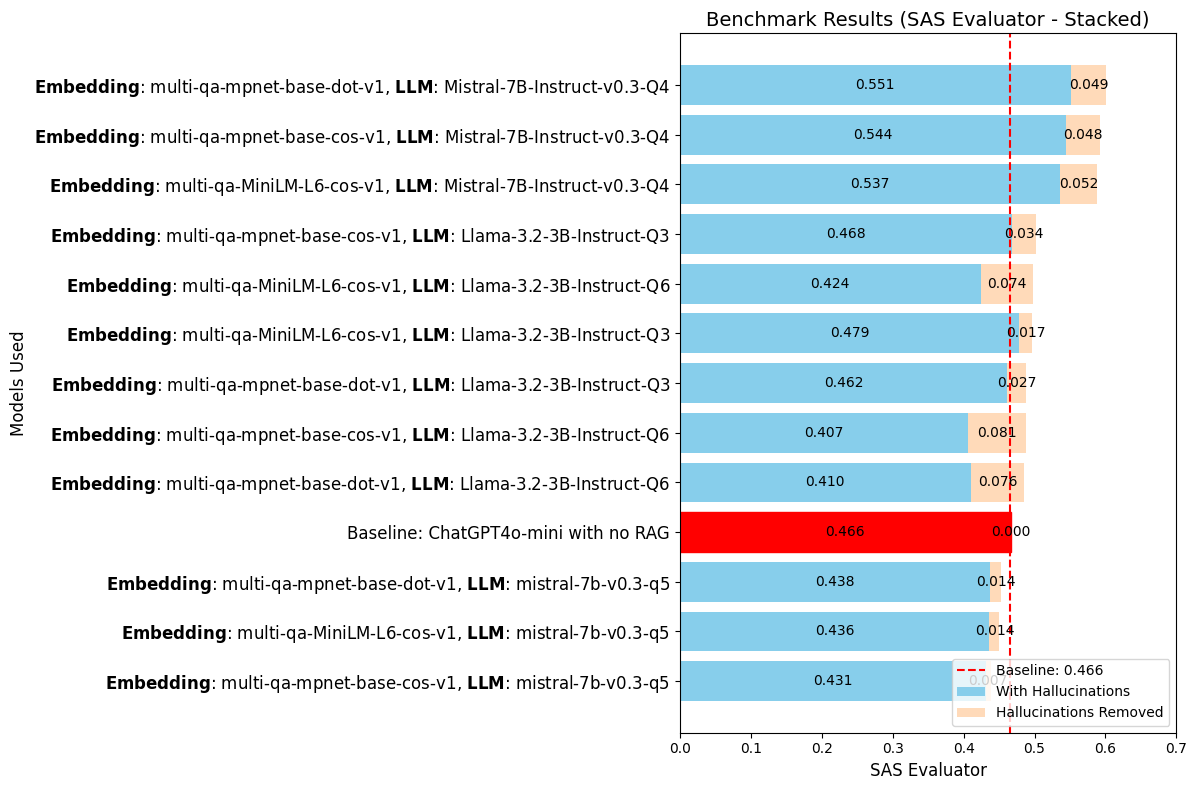

In [75]:
models = ['multi-qa-mpnet-base-dot-v1', 'multi-qa-mpnet-base-cos-v1', 'multi-qa-MiniLM-L6-cos-v1']

pattern = r'results_([a-zA-Z0-9\-\(\)_]+)_model_weights_([a-zA-Z0-9\.\-\_]+(?:-[a-zA-Z0-9]+)*)(?:-Q\d+.*)?(?:_gguf.*?\d+.*)?\.csv'

with_q = 'results_allmodels_withquestion'
cut_q = 'results_allmodels_cutquestion'

better_results = highest_eval(cut_q, 'sas_evaluator')
worse_results = highest_eval(with_q, 'sas_evaluator')

plot_stacked_benchmark_results(better_results, worse_results, pattern, 'SAS Evaluator', 'results_gpt4o-mini_NO-RAG.csv', models = models)

# PCA of Embedding Space

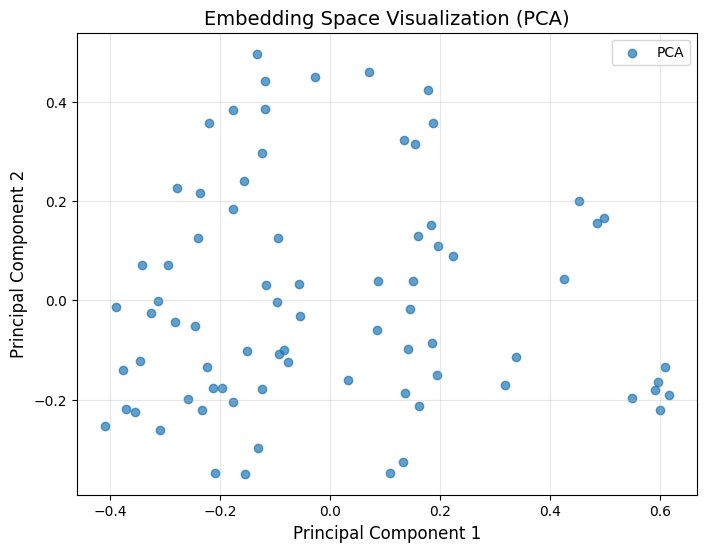

In [ ]:
import numpy as np
import json
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

with open('./data/DocMerged.json', 'r') as file:
    document_store = json.load(file)

# Extract embeddings
embeddings = [
    doc['embedding'] 
    for doc in document_store['documents'] 
    if 'embedding' in doc
]

# Convert to numpy array
embeddings = np.array(embeddings)

# Dimensionality reduction (using PCA)
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings)


# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1], alpha=0.7, label='PCA')
plt.title('Embedding Space Visualization (PCA)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

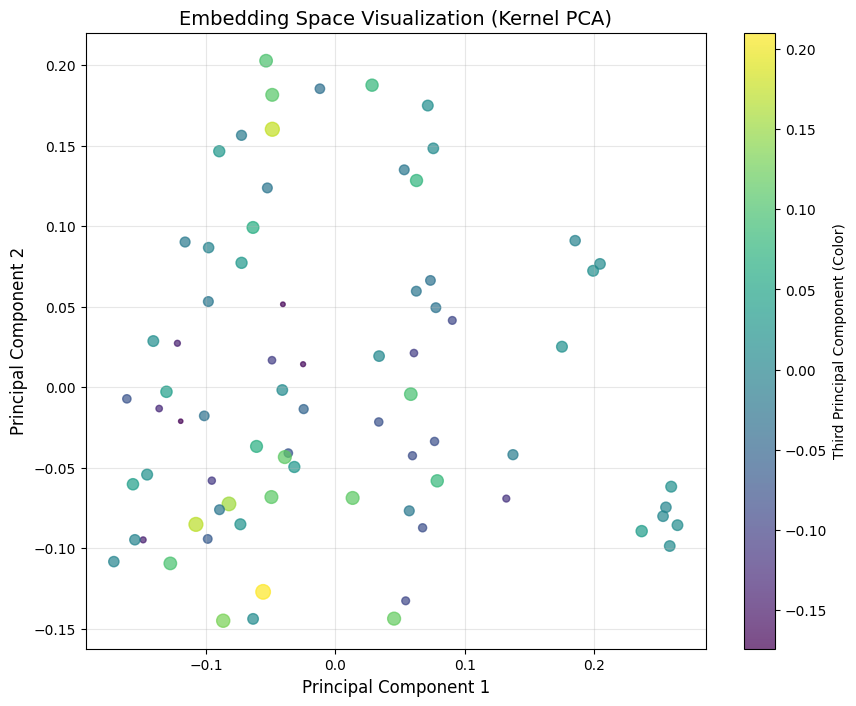

In [385]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=3, kernel='rbf', gamma=0.1)  # Adjust 'kernel' and 'gamma' as needed
reduced_embeddings_kpca = kernel_pca.fit_transform(embeddings)

# Extract the third principal component
third_component = reduced_embeddings_kpca[:, 2]

# Normalize the third component for sizing the dots
dot_sizes = (third_component - third_component.min()) / (third_component.max() - third_component.min()) * 100 + 10

# Plot Kernel PCA with size representing the third component
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    reduced_embeddings_kpca[:, 0], 
    reduced_embeddings_kpca[:, 1], 
    s=dot_sizes,  # Use normalized third component as sizes
    alpha=0.7, 
    c=third_component,  
    cmap='viridis'
)
plt.colorbar(scatter, label="Third Principal Component (Color)")
plt.title('Embedding Space Visualization (Kernel PCA)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Hyperparameter Tuning Visualization

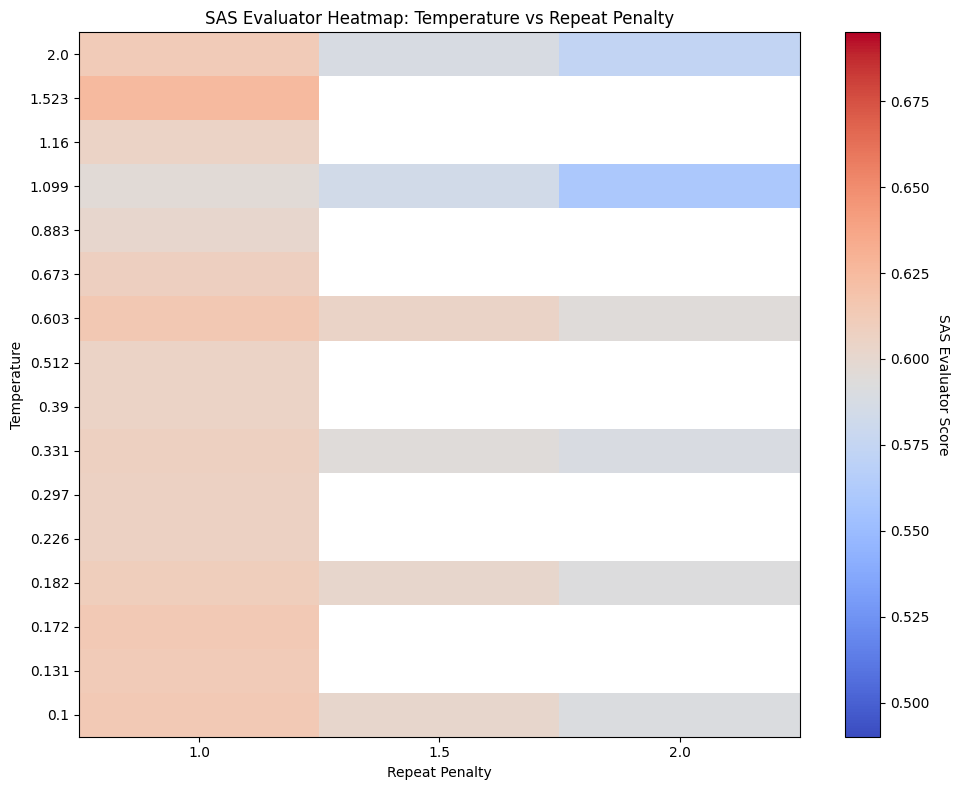

    Temperature  Repeat Penalty     Score
0         1.099             1.5  0.584195
1         0.172             1.0  0.614152
2         0.331             1.5  0.594347
3         0.182             1.5  0.601791
4         2.000             1.0  0.612564
5         0.331             1.0  0.607408
6         2.000             2.0  0.573662
7         0.331             2.0  0.589137
8         0.100             2.0  0.590887
9         0.673             1.0  0.608320
10        0.100             1.0  0.613925
11        0.100             1.5  0.602023
12        0.603             2.0  0.594335
13        0.182             2.0  0.591958
14        0.883             1.0  0.600962
15        0.512             1.0  0.604658
16        0.603             1.0  0.614827
17        0.182             1.0  0.609413
18        1.099             1.0  0.596019
19        0.390             1.0  0.604789
20        1.099             2.0  0.560141
21        0.226             1.0  0.606560
22        1.160             1.0  0

In [120]:
folder_path = 'results_temp_rp_optimization'
evaluators = 'sas_evaluator'  

results = highest_eval(folder_path, evaluators)
min_val = min(results.values()) - 0.07
max_val = max(results.values()) + 0.07
# Try with one color
plot_temperature_vs_penalty(results, metric_name='SAS Evaluator', color_range = (min_val, max_val))

# Final Results 